# **Introduction**
## **Problem Description**

Insurance companies take risks over customers. Risk management is a very important aspect of the insurance industry. Insurers consider every quantifiable factor to develop profiles of high and low insurance risks. Insurers collect vast amounts of information about policyholders and analyze the data.

## **Problem Statement**
To analyze with available data and to predict whether the customer will apply for insurance claim or not.

# **Stakeholder**
- CFO
- Head of marketing
- Head of Claims division

We are considering **CFO** as our stakeholder

## **Evaluation Metric**

The evaluation metric for this task will be `precision_score`. Read up about it more [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
# Change coloumn name Commision

df_train.columns = ['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commission', 'Age',
       'Claim']
df_train

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commission,Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.000000,0.0000,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.000000,0.0000,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.800000,11.8800,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.000000,0.0000,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.000000,0.0000,36,0
...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365,SINGAPORE,444.750593,111.1858,40,1
52306,5282,RAB,Airlines,Online,Value Plan,8,BRUNEI DARUSSALAM,23.000000,9.2000,54,0
52307,7083,C2B,Airlines,Online,Bronze Plan,38,SINGAPORE,61.100000,15.2800,37,0
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2,THAILAND,10.000000,0.0000,46,0


# **Claim Rate  vs Agency Type**

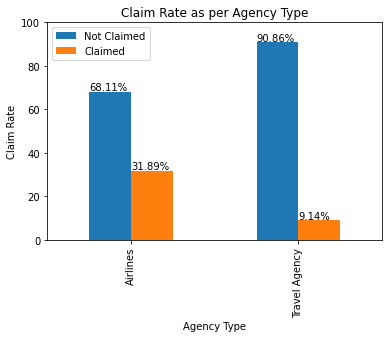

In [5]:
#Plotting graph for Claim Rate vs Agency Type
# plt.figure(figsize=(10,8))
claim_agencytype = pd.DataFrame(df_train.groupby(['Agency Type'])['Claim'].value_counts(normalize = True)*100)
claim_agencytype.columns = ['Claim_Rate'] #Replacing claim column with claim rate
ax = claim_agencytype.unstack().plot(kind= 'bar')

for i in ax.patches:
    w,h = i.get_width(), i.get_height()
    x,y = i.get_xy()
    ax.annotate(str(np.round(h,2)) + '%', (x,y+h+0.5))
    
plt.ylabel('Claim Rate')
plt.legend(['Not Claimed', 'Claimed'])
plt.title('Claim Rate as per Agency Type')
plt.ylim(0,100)
plt.show()

**Insights :** Airlines have higher claim rate compared to travel agency

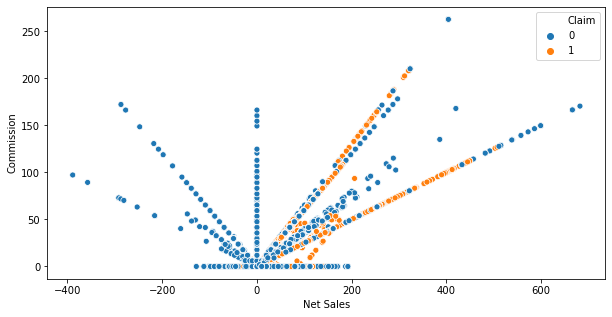

In [6]:
# To check correlation between Netsales & Commision
plt.figure(figsize=(10,5))
sns.scatterplot('Net Sales', 'Commission', hue = 'Claim', data = df_train);

# **Distribution of Claim & Commision as per Agency**
***

In [7]:
#Table for CLaim & commission for Agency
table1=pd.crosstab(df_train['Agency'],df_train['Claim'],margins=True)

# table1.drop(index=['All'],inplace=True)
table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=df_train.groupby('Agency')['Commission'].mean()
table1['Count'] = df_train.groupby('Agency')['Claim'].count()
table1

Claim,0,1,All,mean commision,Count
Agency,,,,,
ADM,100.000000,0.000000,100.0,39.458929,56.0
ART,100.000000,0.000000,100.0,10.154215,223.0
C2B,51.229392,48.770608,100.0,24.079775,10615.0
CBH,98.684211,1.315789,100.0,10.056316,76.0
CCR,93.589744,6.410256,100.0,10.499062,156.0
CSR,98.333333,1.666667,100.0,10.686500,60.0
CWT,87.553207,12.446793,100.0,33.443827,6813.0
EPX,92.829354,7.170646,100.0,0.016009,26218.0
JWT,94.363636,5.636364,100.0,21.950913,550.0


## **Graphical representation for claimed agency** 

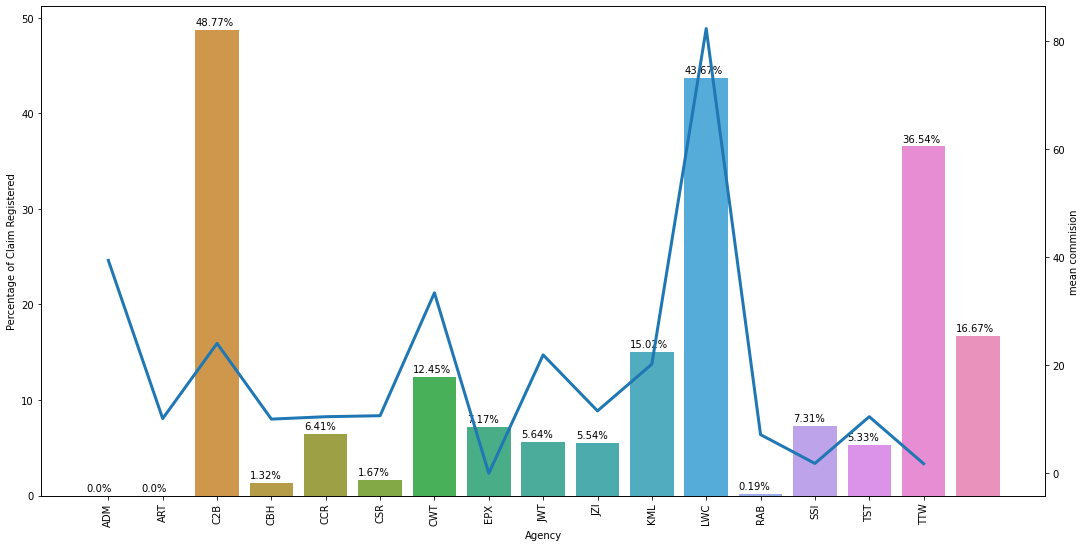

In [8]:
# Graphical representation for claimed agency 
fig,ax1=plt.subplots(figsize=(18,9))
ay = sns.barplot(table1.index,table1[1],ax=ax1)

for i in ay.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ay.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3);

**Insights :**
- Certain agencies have less registered claims but they draw high commission on the Insurance policies (CBH, CSR, CWT, JWT)
- C2B & TTW have higher percent of registered claims but the mean commission is very low
- LWC have higher claim rate & mean commission

### Counts for Claim registered

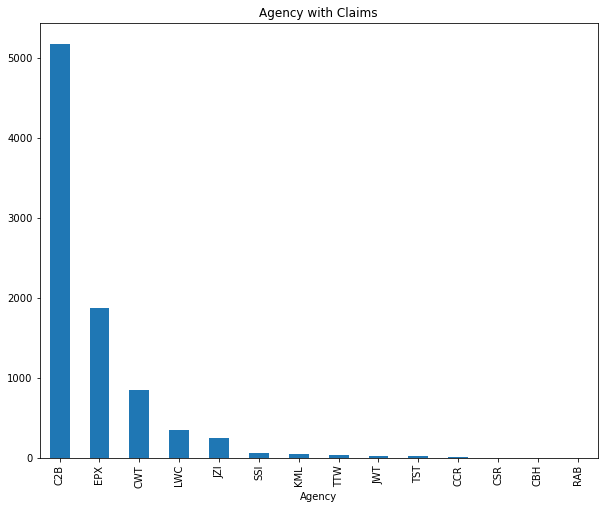

In [9]:
#Counts for  Claim registered
plt.figure(figsize=(10,8))
claimed=df_train[df_train['Claim']==1]
claimed['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency with Claims')
plt.xlabel('Agency')
plt.show()

### Top 5 Claimed Insurance with Agencies

<Figure size 720x576 with 0 Axes>

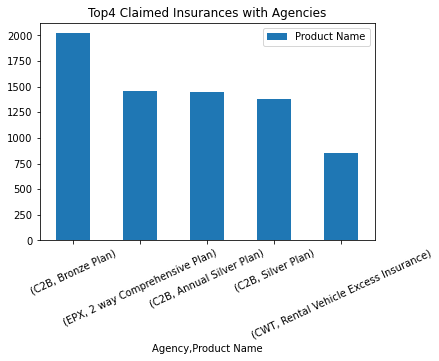

In [10]:
#plotting top5 Claimed Insurances with Agencies
claimed=df_train[df_train['Claim']==1]
plt.figure(figsize=(10,8))
pd.DataFrame(claimed.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:5].plot(kind='bar')
plt.xticks(rotation=25)
plt.title('Top4 Claimed Insurances with Agencies')
plt.show()

**Insights :** C2B has maximum claims registered for Bronze and Annual Silver Plan followed by EPX in 2 way Comprehensive Plan<br> 
**Recommendations :** We should increase the premium of these Plans. Automate the process with less overhead and overlay

## **Graphical representation for unclaimed agency** 

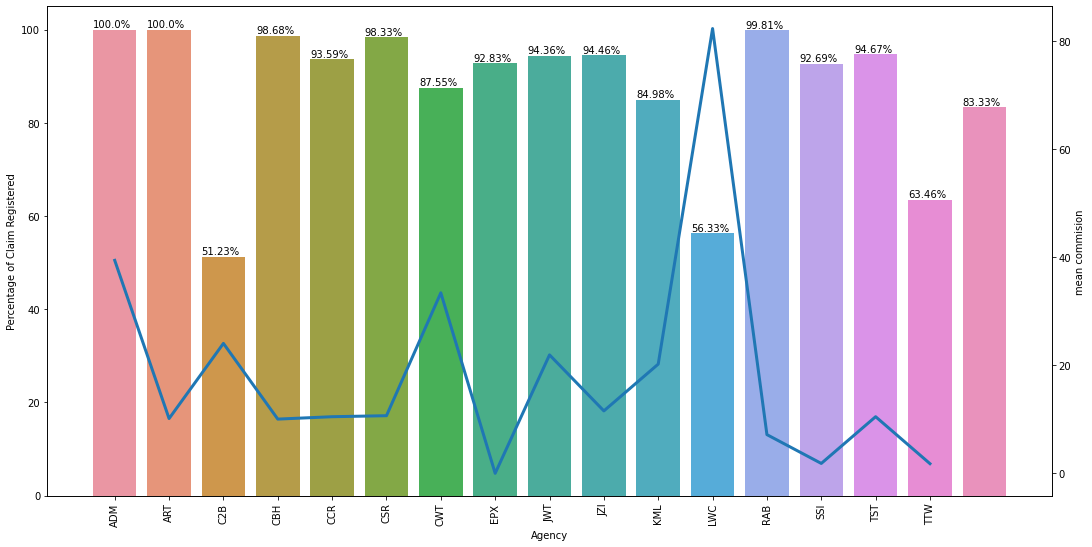

In [11]:
# Graphical representation for unclaimed agency 
fig,ax1=plt.subplots(figsize=(18,9))
ay = sns.barplot(table1.index,table1[0],ax=ax1)

for i in ay.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    ay.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3);

**Insights :**
- ADM & ART has no registered claim but commission is high

### Counts for No Claims

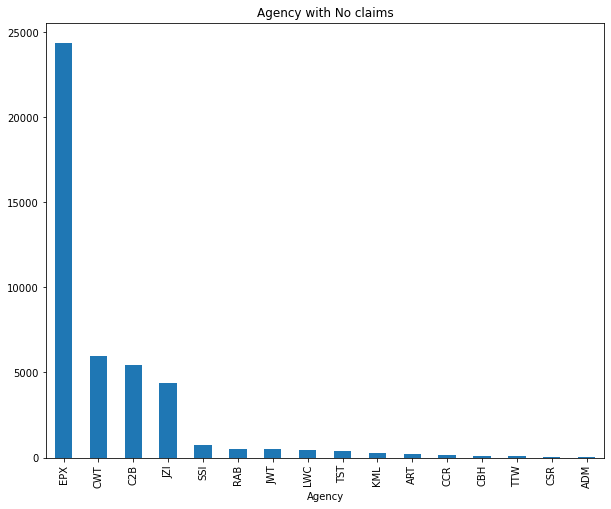

In [12]:
#Counts for  no claims
plt.figure(figsize=(10,8))
unclaim=df_train[df_train['Claim']==0]
unclaim['Agency'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Agency with No claims')
plt.xlabel('Agency')
plt.show()


### Top 5 Unclaimed insurance with Agencies

<Figure size 720x576 with 0 Axes>

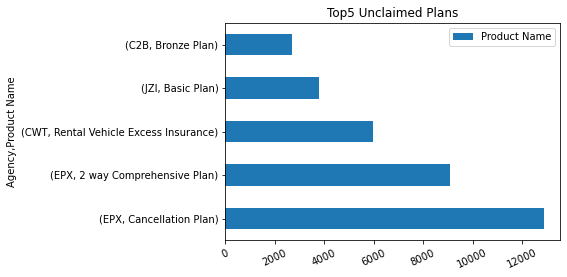

In [13]:
#plotting graph with for unclaimed products of an agency from high to low
plt.figure(figsize=(10,8))
pd.DataFrame(unclaim.groupby(['Agency'])['Product Name'].value_counts().sort_values(ascending=False))[:5].plot(kind='barh')
plt.xticks(rotation=25)
plt.title('Top5 Unclaimed Plans')
plt.show()

**Insights :** Mostly unclaimed insurances are from Travel Agencies like EPX and C2B forinsurances such as cancellation plan,2-way Comprehensive Plan and Rental Vehicle Excess. Online insurances like cancellation plan,2-way Comprehensive Plan are mostly unclaimed in EPX<br>
**Recommendations :** Such plans should be targeted extensively on OTA as well as on our website extensively.

## **Highest Average Commission for Top 5 agency**

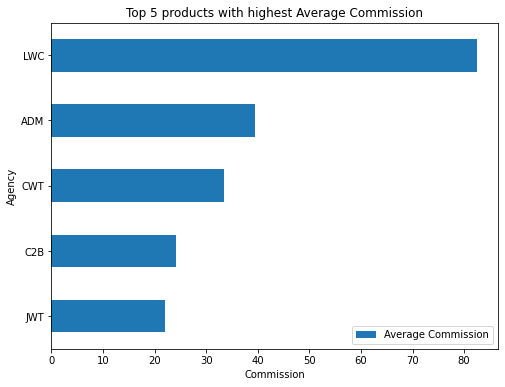

In [14]:
# Average commission for top 5 Agency
prod_comm_mean = df_train.groupby(['Agency'])[['Commission']].mean().sort_values('Commission', ascending = False)[:5]
prod_comm_mean.sort_values('Commission', ascending = True).plot(kind = 'barh', figsize = (8,6))
plt.title('Top 5 products with highest Average Commission')
plt.xlabel('Commission')
plt.ylabel('Agency')
plt.legend(['Average Commission'])
plt.show()

# **Distribution of Claim & Commission as per Product Name**
***

In [15]:
table2=pd.crosstab(df_train['Product Name'],df_train['Claim'],margins=True)
table2=(table2.div(table2['All'],axis=0))*100

table2['mean commision']=df_train.groupby('Product Name')['Commission'].mean()
table2['Count'] = df_train.groupby('Product Name')['Claim'].count()
table2.drop(index=['All'],inplace=True)
table2

Claim,0,1,All,mean commision,Count
Product Name,,,,,
1 way Comprehensive Plan,97.177252,2.822748,100.0,0.018054,2409.0
2 way Comprehensive Plan,86.196116,13.803884,100.0,0.026359,10555.0
24 Protect,100.000000,0.000000,100.0,7.627212,165.0
Annual Gold Plan,41.694915,58.305085,100.0,91.491629,295.0
Annual Silver Plan,38.202726,61.797274,100.0,57.291729,2348.0
Annual Travel Protect Gold,34.426230,65.573770,100.0,168.162634,183.0
Annual Travel Protect Platinum,72.000000,28.000000,100.0,215.064490,50.0
Annual Travel Protect Silver,66.304348,33.695652,100.0,133.677591,92.0
Basic Plan,93.913904,6.086096,100.0,9.591361,4042.0


## **Graphical representation of Product & commission with claims registered**

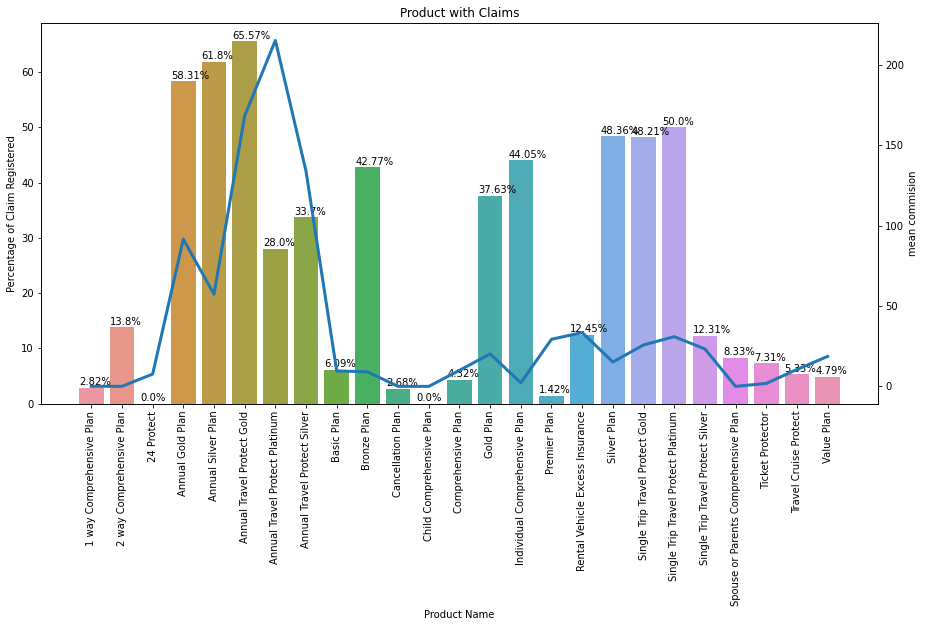

In [16]:
#Product with Claim registered
fig,ax1=plt.subplots(figsize=(15,7))
az = sns.barplot(table2.index,table2[1],ax=ax1)

for i in az.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    az.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
plt.title('Product with Claims')
ax1.set(ylabel='Percentage of Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)
plt.show()

**Insights :**
- Annual Gold & Annual Silver Plan have higher number of Claims registered whereas commission drawn is  very low
- Annual Travel Protect Platinum plan has low number of Claims registered whereas commission drawn is very high

### Product counts with Claims

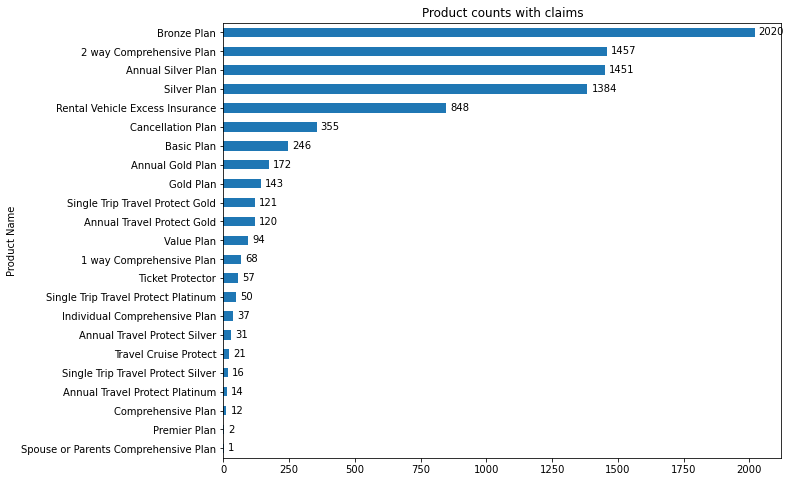

In [17]:
#Caunts for claims
plt.figure(figsize=(10,8))
claim=df_train[df_train['Claim']==1]
ax = claim['Product Name'].value_counts().sort_values(ascending=True).plot(kind='barh')

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w+15,y+.1),color='black',)
    
plt.title('Product counts with claims')
plt.ylabel('Product Name')
plt.show()

## **Graphical representation of Product & commission with No claims registered**

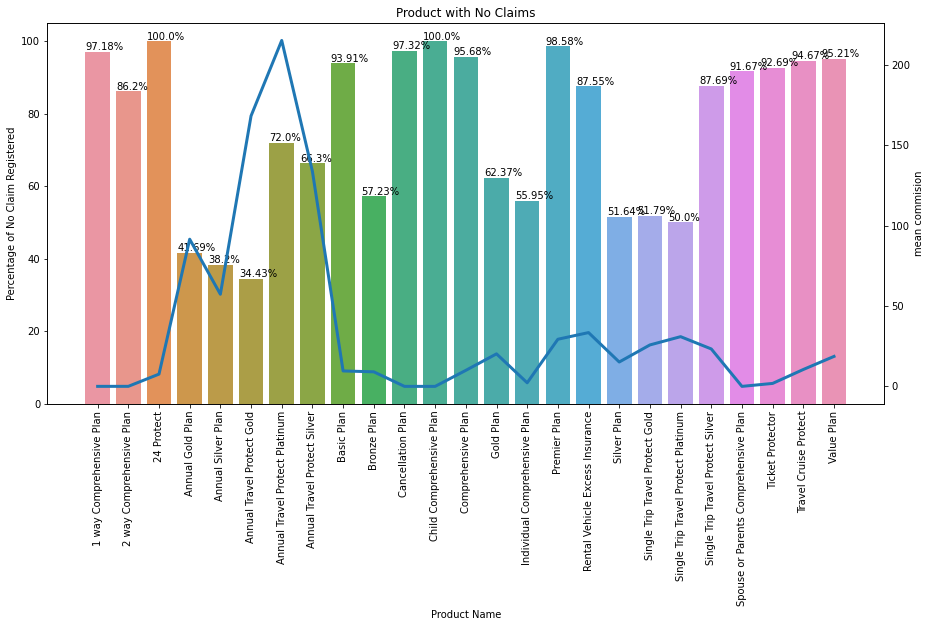

In [18]:
#Product with  No Claim registered
fig,ax1=plt.subplots(figsize=(15,7))
az = sns.barplot(table2.index,table2[0],ax=ax1)

for i in az.patches:
    w,h = i.get_width(),i.get_height()
    x,y = i.get_xy()
    az.annotate(str(np.round(h,2))+ '%',(x,y+h+0.5))
    
plt.xticks(rotation=90)
plt.title('Product with No Claims')
ax1.set(ylabel='Percentage of No Claim Registered')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)
plt.show()

### Product counts with No claims

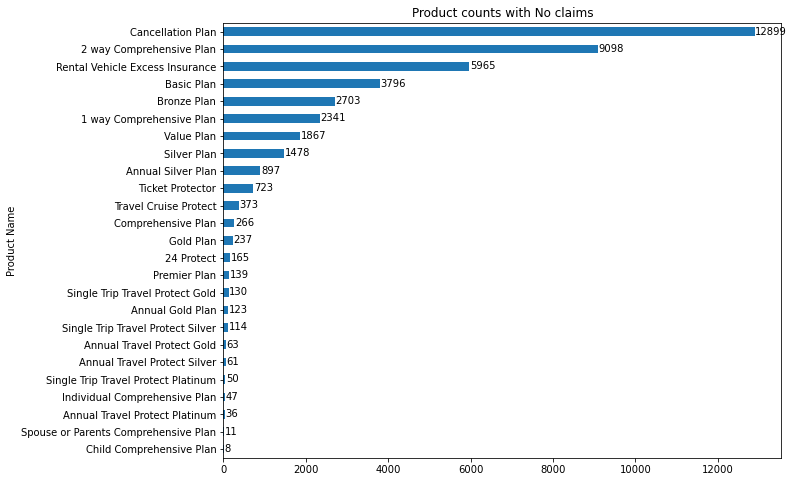

In [19]:
#Caunts for  No claims
plt.figure(figsize=(10,8))
no_claim=df_train[df_train['Claim']==0]
ax = no_claim['Product Name'].value_counts().sort_values(ascending=True).plot(kind='barh')

for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w+15,y+.1),color='black',)
    
plt.title('Product counts with No claims')
plt.ylabel('Product Name')
plt.show()

## **Total Commission for Top 5 products**

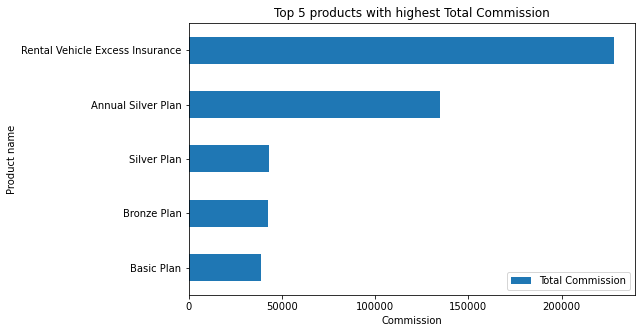

In [20]:
# Plotting for Total Commission for Top 5 products
prod_comm_sum = df_train.groupby(['Product Name'])[['Commission']].sum().sort_values('Commission', ascending = False)[:5]

prod_comm_sum.sort_values('Commission', ascending = True).plot(kind='barh', figsize = (8,5))
plt.title('Top 5 products with highest Total Commission')
plt.xlabel('Commission')
plt.ylabel('Product name')
plt.legend(['Total Commission'])
plt.show()

## **Average Commission for Top 5 products**

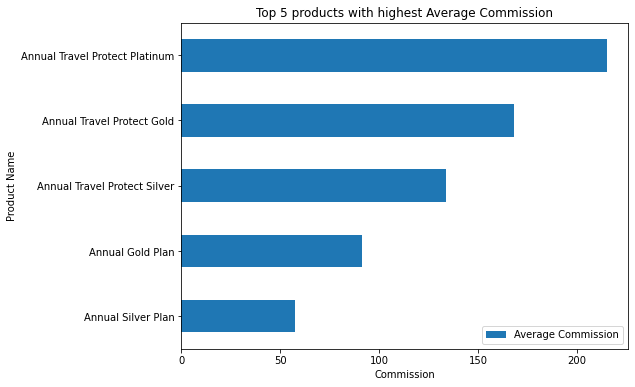

In [21]:
# Average commission for top 5 products
prod_comm_mean = df_train.groupby(['Product Name'])[['Commission']].mean().sort_values('Commission', ascending = False)[:5]
prod_comm_mean.sort_values('Commission', ascending = True).plot(kind = 'barh', figsize = (8,6))
plt.title('Top 5 products with highest Average Commission')
plt.xlabel('Commission')
plt.ylabel('Product Name')
plt.legend(['Average Commission'])
plt.show()

## **Claim rate for Top 5 products with Higher commission**

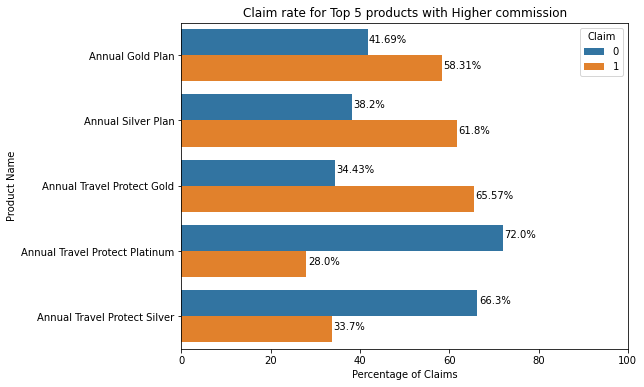

In [22]:
#Claim rate for Top 5 products with Higher commission
prod_claim_percent = pd.DataFrame(df_train.groupby(['Product Name'])['Claim'].value_counts(normalize = True)*100)
prod_claim_percent.columns = ['Claim Percent']
prod_claim_percent.reset_index(inplace = True)

list_netsales = ['Annual Travel Protect Platinum', 'Annual Travel Protect Gold', 'Annual Travel Protect Silver',
                 'Annual Gold Plan', 'Annual Silver Plan']


#Net Sales mean
fig = plt.figure(figsize = (8,6))
ax = sns.barplot(y='Product Name', x ='Claim Percent',
                 data = prod_claim_percent[ (prod_claim_percent['Product Name'] == list_netsales[0])|
                                            (prod_claim_percent['Product Name'] == list_netsales[1])|
                                            (prod_claim_percent['Product Name'] == list_netsales[2])|
                                            (prod_claim_percent['Product Name'] == list_netsales[3])|
                                            (prod_claim_percent['Product Name'] == list_netsales[4])]
                ,hue = 'Claim')
plt.title('Claim rate for Top 5 products with Higher commission')
plt.xlabel('Percentage of Claims')
plt.xlim((0,100))

for p in ax.patches:
    _x = p.get_x() + p.get_width() +0.3
    _y = p.get_y() + p.get_height() - 0.2
    value = str(np.round(p.get_width(),2)) + '%'
    ax.text(_x, _y, value, va='baseline', ha='left')
    
plt.show()

# **Which is frequently purchased travel product?**

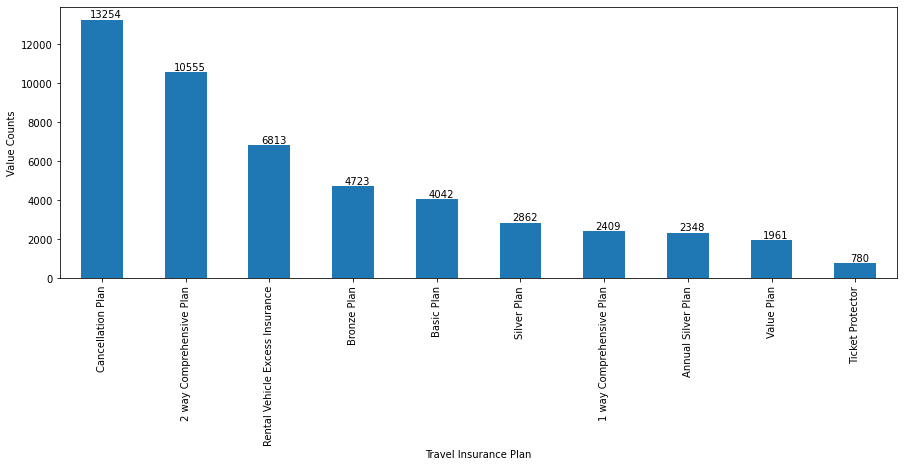

In [23]:
graph1 = df_train["Product Name"].value_counts().iloc[:10].plot(kind="bar", figsize=(15,5))
plt.xlabel('Travel Insurance Plan')
plt.ylabel('Value Counts')
for p in graph1.patches:
        graph1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

**Insights :**<br>
- Cancellation plans & 2 way Comprehensive plans are contributing more in Sales

**Recommendation :**<br>
- Cancellation plan have less claims so Agencies should focus more on this plan

# **Net Sales vs Products**

## **Top 5 Products with highest Average Sales**

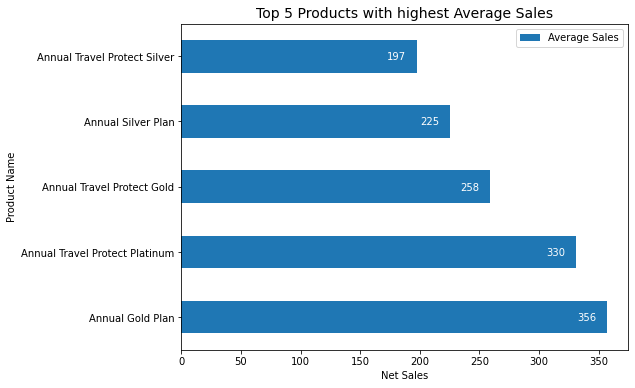

In [24]:
prod_netsales_mean = df_train.groupby(['Product Name'])[['Net Sales']].mean().sort_values('Net Sales', ascending = False)[:5]
ax = prod_netsales_mean.plot(kind='barh', figsize = (8,6))
plt.title('Top 5 Products with highest Average Sales',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Average Sales'])
for p in ax.patches:
    w,h = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate(str(int(w)), (x+w-25,y+.2),color='white',)


plt.show()

## **Top 5 Products with highest Total Sales**

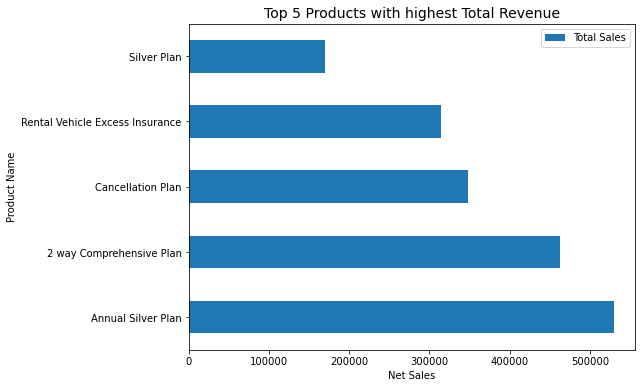

In [25]:
#Top 5 products by sum of Net Sales

prod_netsales_sum = df_train.groupby(["Product Name"])[["Net Sales"]].sum().sort_values("Net Sales", ascending = False).iloc[:5]

prod_netsales_sum.plot(kind='barh',figsize=(8,6))
plt.title('Top 5 Products with highest Total Revenue',fontdict={'fontsize':14})
plt.xlabel('Net Sales')
plt.ylabel('Product Name')
plt.legend(['Total Sales'])

plt.show()

# **Agencies with the most number of Net Sales**

In [26]:
netsales_mean = (df_train.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,124.931231
15,TTW,95.431133
2,C2B,94.265597
8,JWT,53.939570
0,ADM,53.928571
10,KML,51.033281
6,CWT,46.103047
7,EPX,33.486356
5,CSR,32.383333
9,JZI,31.807839


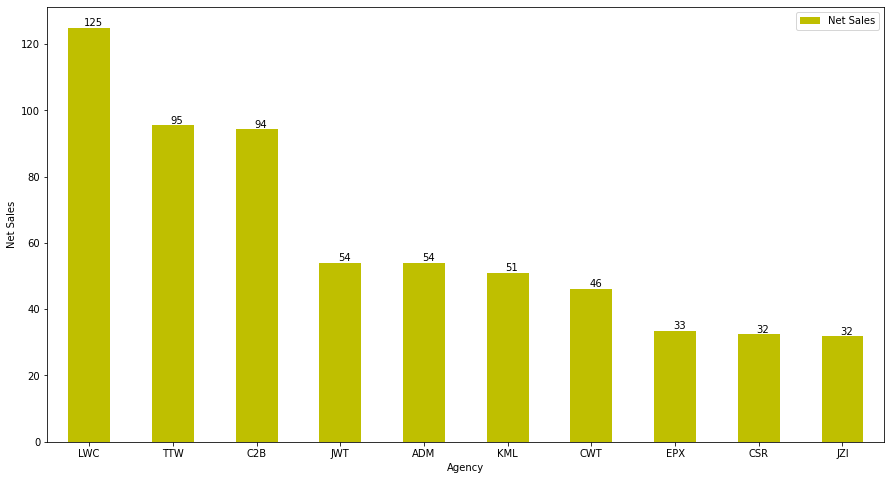

In [27]:
graph = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0, color = "y",figsize=(15,8))
plt.xlabel('Agency')
plt.ylabel('Net Sales')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

# **Net Sales vs Commission**

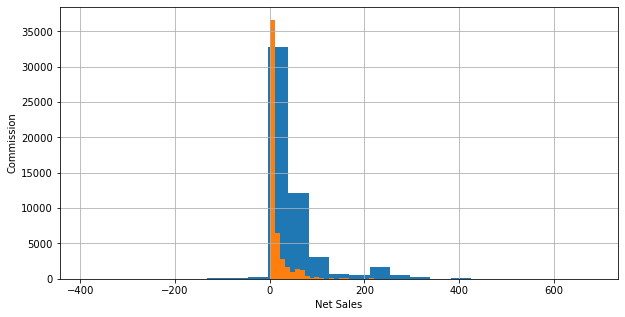

In [28]:
# Graph comparison for Net sales & Commision
plt.figure(figsize=(10,5))
df_train["Net Sales"].hist(bins =25)
df_train["Commission"].hist(bins =25)
plt.xlabel('Net Sales')
plt.ylabel('Commission')
plt.show()

### <b>Insight : 
These both column seems to related but the graph plot shows disparency as low net sales shows high commison which is not pratically possible.
***

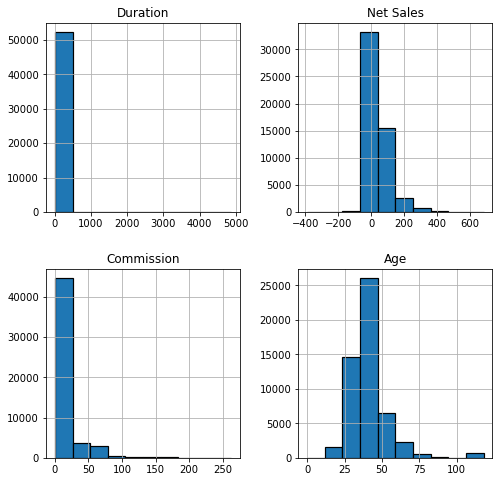

In [29]:
df_train[['Duration', 'Net Sales', 'Commission', 'Age']].\
hist(edgecolor='black', linewidth=1.2, figsize=(8, 8))
plt.show()

# **Age group of customers with Claims reported**

In [30]:
# Computing age above 118 as 99 and dividind it in Categories : Child, Adult, Senior.
def age_convert(age):
    result = ''
    if(age <= 17):
        result = 'Child'
    elif(age <= 24):
        result = 'Youth'
    elif(age <=34):
        result = 'Professional'
    elif(age <= 44):
        result = 'Adult (35-44)'
    elif(age <= 54):
        result = 'Adult (45-54)'
    else:
        result = 'Senior'
    return result

We've segregated age of person with different group as `Child` with age less than 21, `Adult` with age 22-50

In [31]:
df_train['Age Group'] = df_train['Age'].map(lambda x: age_convert(x))
df_train.pivot_table(index = ['Age Group'], values = ['Net Sales'], aggfunc = 'count')
df_train.groupby('Age Group')['Claim'].value_counts()

Age Group      Claim
Adult (35-44)  0        22992
               1         3119
Adult (45-54)  0         5704
               1         1062
Child          0           86
               1           11
Professional   0         8630
               1         3357
Senior         0         4552
               1          730
Youth          0         1626
               1          441
Name: Claim, dtype: int64

<Figure size 360x360 with 0 Axes>

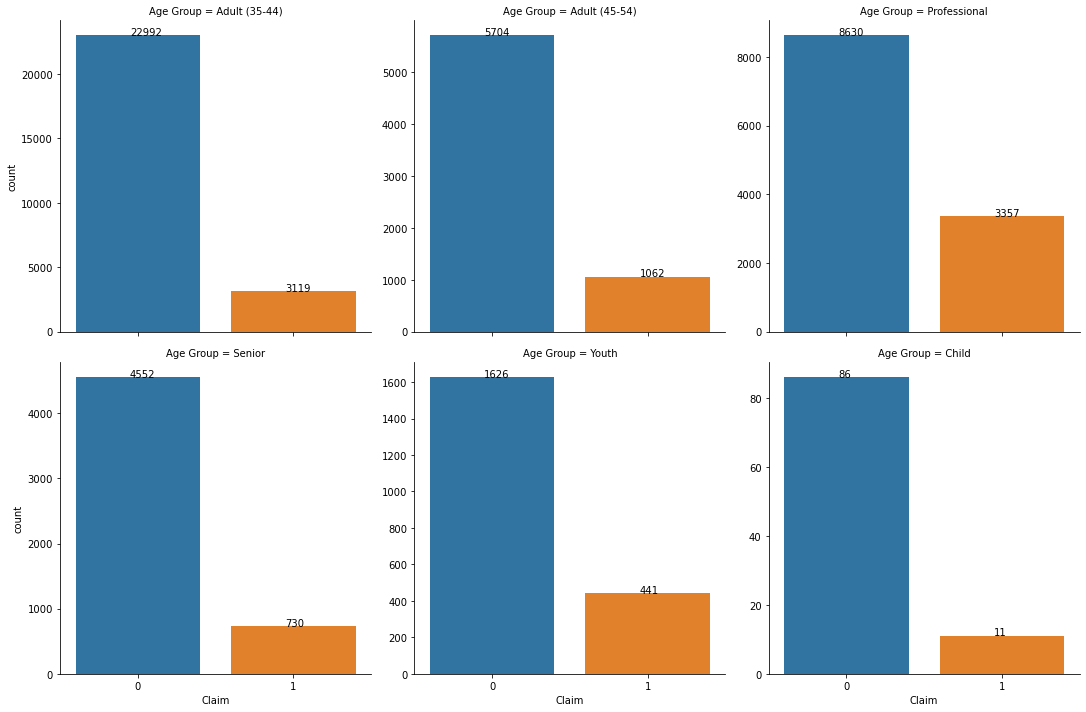

In [32]:
fig = plt.figure(figsize = (5,5))
graph = sns.catplot('Claim', col = 'Age Group',col_wrap= 3, data = df_train, kind='count',sharey=False)

for i in range(6):
    for p in graph.facet_axis(0,i).patches:
        graph.facet_axis(0,i).annotate(str(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1))
plt.show()

# **Claims registered w.r.t duration of trip**

In [33]:
df_train['Duration_label']=pd.qcut(df_train['Duration'],q=25)
table3=pd.crosstab(df_train['Duration_label'],df_train['Claim'],normalize='index')
table3

Claim,0,1
Duration_label,,
"(-2.001, 3.0]",0.962483,0.037517
"(3.0, 4.0]",0.949863,0.050137
"(4.0, 6.0]",0.892769,0.107231
"(6.0, 7.0]",0.899215,0.100785
"(7.0, 8.0]",0.856589,0.143411
"(8.0, 10.0]",0.842852,0.157148
"(10.0, 11.0]",0.847759,0.152241
"(11.0, 13.0]",0.837329,0.162671
"(13.0, 15.0]",0.857715,0.142285


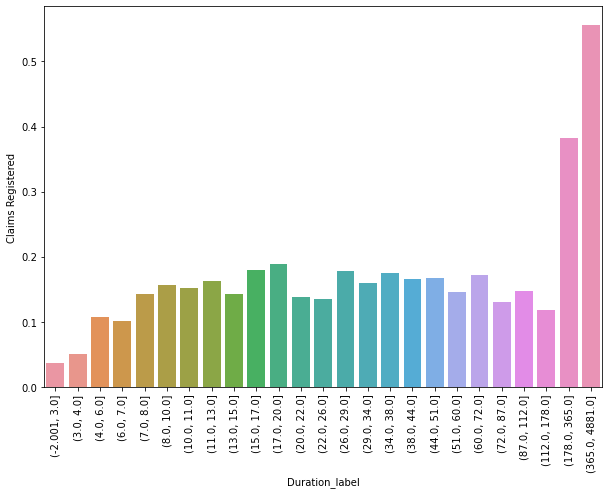

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(table3.index,table3[1])
plt.ylabel('Claims Registered')
plt.xticks(rotation=90);

### <b>Insight : 
- High claims are registered when the duration of travel is more than 365 days
- Durations > 178 days have a high percentage of registered claims compared to the rest.